In [64]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [65]:
from util.structs import DataCluster, Dataset, Measurement
from util import mymath, csv_table, graph, graph_fit
import numpy as np

In [66]:
U_E = 0.1902

table = csv_table.read("./data/234f")
header = table[0]
print(header)
table_data = table[1:]

data = DataCluster()

for row in table_data:
    data.add(Dataset({
        "f": Measurement(float(row[0]), "1%"),
        "U_AT": Measurement(float(row[1]), "1%") * 1e-3,
        "U_AH": Measurement(float(row[2]), "1%") * 1e-3,
        "U_AS": Measurement(float(row[3]), "1%", min_error=1e-2) * 1e-3,
    }))

data.save.to_excel("./output/input_table_234f")
data.round_index("U_AT")
data.round_index("U_AH")
data.round_index("U_AS")
print(data)

['f' ' U_A tief' ' U_A hoch' ' U_A sperr']
U_AH             | U_AS             | U_AT             | f               
-----------------+------------------+------------------+-----------------
(600.0 ± 6.0)e-5 | (600.0 ± 6.0)e-5 | (360.0 ± 4.0)e-3 | (100.0 ± 1.0)e-1
(130.0 ± 2.0)e-4 | (100.0 ± 1.0)e-5 | (376.0 ± 4.0)e-3 | (200.0 ± 2.0)e-1
(350.0 ± 4.0)e-4 | (100.0 ± 1.0)e-5 | (382.0 ± 4.0)e-3 | (500.0 ± 5.0)e-1
(730.0 ± 8.0)e-4 | (700.0 ± 8.0)e-5 | (379.0 ± 4.0)e-3 | (100.0 ± 1.0)   
(142.0 ± 2.0)e-3 | (310.0 ± 4.0)e-4 | (359.0 ± 4.0)e-3 | (200.0 ± 2.0)   
(271.0 ± 3.0)e-3 | (195.0 ± 2.0)e-3 | (272.0 ± 3.0)e-3 | (500.0 ± 5.0)   
(342.0 ± 4.0)e-3 | (358.0 ± 4.0)e-3 | (171.0 ± 2.0)e-3 | (100.0 ± 1.0)e+1
(362.0 ± 4.0)e-3 | (374.0 ± 4.0)e-3 | ( 91.0 ± 1.0)e-3 | (200.0 ± 2.0)e+1
(320.0 ± 4.0)e-3 | (323.0 ± 4.0)e-3 | (300.0 ± 3.0)e-4 | (500.0 ± 5.0)e+1



In [67]:
R = Measurement(100, "1%");
C = Measurement(1.5, "1%") * 1e-6;
U_E = 20 / 2 / 20 / np.sqrt(2);
print(U_E)
omega_gr = 1 / R / C
print(omega_gr)
f_gr = 1/2 / np.pi * omega_gr
print(f_gr)

# Sperrfilter
f_0 = Measurement(35, 10);

0.35355339059327373
(666.7 ± 9.4)e+1
(106.1 ± 1.5)e+1


In [68]:
for d in data:
    # Hoch-/Tiefpass
    d["log10 f/f_gr"] = np.log10(d["f"] / f_gr); 
    d["dB U_AH"] = 20 * np.log10(d["U_AH"] / U_E); 
    d["dB U_AT"] = 20 * np.log10(d["U_AT"] / U_E); 
    # Sperrfilter
    d["log10 f/f_0"] = np.log10(d["f"] / f_0);
    d["dB U_AS"] = 20 * np.log10(d["U_AS"] / U_E); 

print(data)
data.save_to_excel_measurements("./output/table_234f")

U_AH             | U_AS             | U_AT             | dB U_AH            | dB U_AS            | dB U_AT            | f                | log10 f/f_0      | log10 f/f_gr      
-----------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------
(600.0 ± 6.0)e-5 | (600.0 ± 6.0)e-5 | (360.0 ± 4.0)e-3 | (-3540.6 ± 8.7)e-2 | (-3540.6 ± 8.7)e-2 | ( 15.7 ± 9.7)e-2   | (100.0 ± 1.0)e-1 | ( -5.4 ± 1.2)e-1 | (-2025.7 ± 7.5)e-3
(130.0 ± 2.0)e-4 | (100.0 ± 1.0)e-5 | (376.0 ± 4.0)e-3 | (-286.9 ± 1.3)e-1  | (-5096.9 ± 8.7)e-2 | ( 53.5 ± 9.2)e-2   | (200.0 ± 2.0)e-1 | ( -2.4 ± 1.2)e-1 | (-1724.7 ± 7.5)e-3
(350.0 ± 4.0)e-4 | (100.0 ± 1.0)e-5 | (382.0 ± 4.0)e-3 | (-2008.8 ± 9.9)e-2 | (-5096.9 ± 8.7)e-2 | ( 67.2 ± 9.1)e-2   | (500.0 ± 5.0)e-1 | (  1.5 ± 1.2)e-1 | (-1326.8 ± 7.5)e-3
(730.0 ± 8.0)e-4 | (700.0 ± 8.0)e-5 | (379.0 ± 4.0)e-3 | (-1370.3 ± 9.5)e-2 | (-3406.7 ± 9.9)e-2 | ( 60.4 ± 9.2)e-2

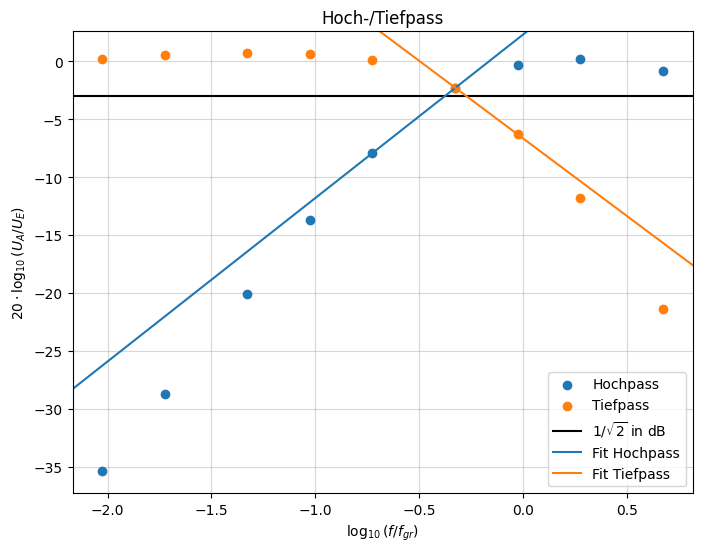

In [69]:
plot = graph.create_plot(figsize=(8, 6));
fig, ax = plot;

ax.set_axisbelow(True)
ax.grid(alpha=.5)

ax.set_title("Hoch-/Tiefpass")
ax.set_xlabel(r"$\log_{10}(f/f_{gr})$")
ax.set_ylabel(r"$20 \cdot \log_{10}(U_A/U_E)$")

graph.scatter_data(data, "log10 f/f_gr", "dB U_AH", plot=plot, label="Hochpass")
graph.scatter_data(data, "log10 f/f_gr", "dB U_AT", plot=plot, label="Tiefpass")

x_hline = 20 * np.log10(1/np.sqrt(2))
ax.axhline(x_hline, label=r"$1/\sqrt{2}$ in dB", color="black")

hoch_data = DataCluster(data[4:6])
hoch = graph_fit.Linear.on_data(hoch_data, "log10 f/f_gr", "dB U_AH")
graph.plot_func(hoch, plot=plot, change_viewport=False, label="Fit Hochpass", with_error=False)

tief_data = DataCluster(data[5:7])
tief = graph_fit.Linear.on_data(tief_data, "log10 f/f_gr", "dB U_AT")
graph.plot_func(tief, plot=plot, change_viewport=False, label="Fit Tiefpass", with_error=False)



ax.legend()

fig.savefig("./output/plot_234f_ht")
fig.savefig("./pdf/plot_234f_ht.pdf")

In [79]:
from util import function_analysis
x_hoch = function_analysis.find_x_for_y(hoch.value_func, x_hline, (-2, 1)) 
x_tief = function_analysis.find_x_for_y(tief.value_func, x_hline, (-2, 1)) 

x_hoch = Measurement(x_hoch[0], "10%")
x_tief = Measurement(x_tief[0], "10%")
# print(f_gr)
print(x_hoch)
print(x_tief)

ax.axvline(x_hoch.value, color="red", linestyle="--", alpha=.75)
ax.axvline(x_tief.value, color="red", linestyle="--", alpha=.75, label="Grenzfrequenzen")
print(10**x_hoch * f_gr)
print(10**x_tief * f_gr)

(-37.6 ± 3.8)e-2
(-27.2 ± 2.7)e-2
( 44.6 ± 3.9)e+1
( 56.7 ± 3.6)e+1


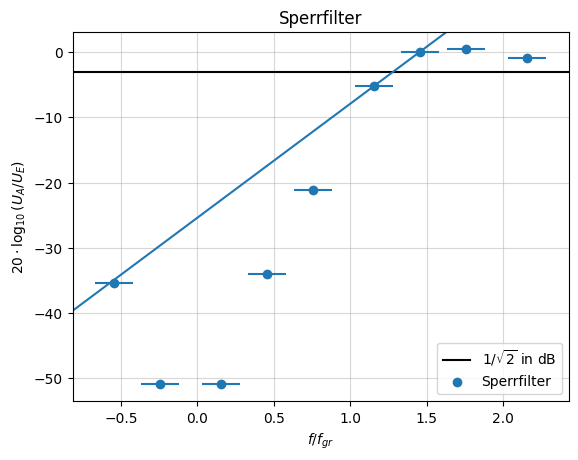

In [71]:
plot = graph.create_plot();
fig, ax = plot;

ax.set_axisbelow(True)
ax.grid(alpha=.5)

ax.set_title("Sperrfilter")
ax.set_xlabel(r"$f/f_{gr}$")
ax.set_ylabel(r"$20 \cdot \log_{10}(U_A/U_E)$")

x_hline = 20 * np.log10(1/np.sqrt(2))
ax.axhline(x_hline, label=r"$1/\sqrt{2}$ in dB", color="black")

graph.scatter_data(data, "log10 f/f_0", "dB U_AS", plot=plot, label="Sperrfilter")

gerade_data = DataCluster(data[5:7])
gerade = graph_fit.Linear.on_data(gerade_data, "log10 f/f_0", "dB U_AS")
graph.plot_func(gerade.value_func, plot=plot, change_viewport=False, with_error=False)

ax.legend();

fig.savefig("./output/plot_234f_sperr")
fig.savefig("./pdf/plot_234f_sperr.pdf")

In [72]:
x_sperr = function_analysis.find_x_for_y(gerade.value_func, x_hline, (0, 2))
x_sperr = Measurement(x_sperr[0], "10%");
print(x_sperr)

( 12.8 ± 1.3)e-1


In [80]:
f_sperr = 10**x_sperr * f_0
f_sperr.significant_digit = 2;
print(f_sperr)

f_strich = (f_sperr - f_0)
f_strich.significant_digit = 2
print(f_strich)
delta_f = f_strich * 2
delta_f.significant_digit = 2
print(delta_f)

(  6.64 ± 2.72)e+2
(  6.29 ± 2.72)e+2
( 12.58 ± 5.45)e+2


In [78]:
Q_exp = f_0 / delta_f
Q_exp.significant_digit =2
print(Q_exp)

(  2.78 ± 1.44)e-2


In [75]:
# df_logged = Measurement(2 * 1.25, 2 * .2);
df_logged = 2 * 1.25
df = 10**df_logged * f_0; 
print(df)
Q_exp = f_0 / df;
print(Q_exp)

( 11.1 ± 3.2)e+3
(  3.2 ± 1.3)e-3


In [76]:
Q_theo = 1 / 2 / np.pi / f_0 / R / C
print(Q_theo)

( 30.3 ± 8.7)
